In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# 库文件
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import matplotlib.pyplot as plt
# 设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  # 替换为你的中文字体文件路径


In [2]:
# 读取Excel文件
excel_path = f"原始数据-时间戳.xlsx"
df_sheet = pd.read_excel(excel_path, sheet_name='Sheet1') 
print(df_sheet.columns)
print(df_sheet.info())


Index(['铁水时间戳', 'P', 'S', 'MN', 'SI', 'V', 'TI', 'As', '铁口1时间戳', '铁口1温度',
       '铁口2时间戳', '铁口2温度', '铁口3时间戳', '铁口3温度', '主参数时间戳', '富氧率', '透气性指数', 'CO',
       'H2', 'CO2', '标准风速', '富氧流量', '冷风流量', '鼓风动能', '炉腹煤气量', '炉腹煤气指数',
       '理论燃烧温度', '顶压', '富氧压力', '冷风压力', '全压差', '热风压力', '实际风速', '热风温度', '顶温东北',
       '顶温西南', '顶温西北', '顶温东南', '阻力系数', '鼓风湿度', '设定喷煤量', '上小时喷煤量'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   铁水时间戳   16252 non-null  float64
 1   P       16252 non-null  float64
 2   S       16252 non-null  float64
 3   MN      16252 non-null  float64
 4   SI      16252 non-null  float64
 5   V       16252 non-null  float64
 6   TI      16252 non-null  float64
 7   As      16252 non-null  float64
 8   铁口1时间戳  7216 non-null   float64
 9   铁口1温度   7216 non-null   float64
 10  铁口2时间戳  2018 non-null   float64
 11  铁口2温度   2018 non

In [3]:
tiesui_df_sheet = df_sheet.iloc[:, 0:8]  # 从第一列到最后一列（不包括第一列）
tiesui_df_sheet = tiesui_df_sheet.rename(columns={'铁水时间戳': '时间戳'})
print(tiesui_df_sheet.columns)
print(tiesui_df_sheet.info())


Index(['时间戳', 'P', 'S', 'MN', 'SI', 'V', 'TI', 'As'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间戳     16252 non-null  float64
 1   P       16252 non-null  float64
 2   S       16252 non-null  float64
 3   MN      16252 non-null  float64
 4   SI      16252 non-null  float64
 5   V       16252 non-null  float64
 6   TI      16252 non-null  float64
 7   As      16252 non-null  float64
dtypes: float64(8)
memory usage: 1015.9 KB
None


In [4]:
temp1_df_sheet = df_sheet.iloc[:, 8:10]  # 从第一列到最后一列（不包括第一列）
temp1_df_sheet = temp1_df_sheet.rename(columns={'铁口1时间戳': '时间戳'})
print(temp1_df_sheet.columns)
print(temp1_df_sheet.info())


Index(['时间戳', '铁口1温度'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间戳     7216 non-null   float64
 1   铁口1温度   7216 non-null   float64
dtypes: float64(2)
memory usage: 254.1 KB
None


In [5]:
control_param_df_sheet = df_sheet.iloc[:, 14:]  # 从第一列到最后一列（不包括第一列）
control_param_df_sheet = control_param_df_sheet.rename(columns={'主参数时间戳': '时间戳'})
print(control_param_df_sheet.columns)
print(control_param_df_sheet.info())


Index(['时间戳', '富氧率', '透气性指数', 'CO', 'H2', 'CO2', '标准风速', '富氧流量', '冷风流量',
       '鼓风动能', '炉腹煤气量', '炉腹煤气指数', '理论燃烧温度', '顶压', '富氧压力', '冷风压力', '全压差',
       '热风压力', '实际风速', '热风温度', '顶温东北', '顶温西南', '顶温西北', '顶温东南', '阻力系数', '鼓风湿度',
       '设定喷煤量', '上小时喷煤量'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间戳     7453 non-null   float64
 1   富氧率     7453 non-null   float64
 2   透气性指数   7453 non-null   float64
 3   CO      7453 non-null   float64
 4   H2      7453 non-null   float64
 5   CO2     7453 non-null   float64
 6   标准风速    7453 non-null   float64
 7   富氧流量    7453 non-null   float64
 8   冷风流量    7453 non-null   float64
 9   鼓风动能    7453 non-null   float64
 10  炉腹煤气量   7453 non-null   float64
 11  炉腹煤气指数  7453 non-null   float64
 12  理论燃烧温度  7453 non-null   float64
 13  顶压      7453 non-null   float64
 14  富氧压力    7453 non-nul

In [36]:
# 定义一个函数，用前后两个值的差值按照距离进行加权替换异常值
def replace_outliers_with_weighted_diff(x, y):
    # 计算列的中位数
    median_value = y.median()
    # 检测异常值的索引
    outliers_index = (y - median_value).abs() > 3.0 * y.std()  # 使用标准差作为阈值
    
    # 遍历异常值的索引
    for idx in outliers_index[outliers_index].index:
        # 获取异常值前一个和后一个值的索引
        prev_idx = idx - 1 if idx - 1 >= 0 else idx
        next_idx = idx + 1 if idx + 1 < len(y) else idx
        # 计算当前 x 与前后两个 x 的距离
        dist_prev = abs(x[idx] - x[prev_idx])
        dist_next = abs(x[next_idx] - x[idx])
        total_dist = dist_prev + dist_next
        # 计算权重
        weight_prev = dist_next / total_dist
        weight_next = dist_prev / total_dist
        # 计算前后两个值的差值
        diff = y[next_idx] - y[prev_idx]
        # 根据权重进行插值
        interpolated_value = y[prev_idx] + weight_prev * diff
        # 用插值结果替代异常值
        y[idx] = interpolated_value

length1 = 40
start1 = 1100


index   = range(start1, start1+length1+1, 1)
all_time = np.arange(13,7584,1)
def single_data_process(df_sheet,item):
    print(df_sheet.columns)
    print(df_sheet.info())
    # 删除包含NaN值的行
    df_sheet.dropna(inplace=True)
    print(df_sheet.head)



    plt.figure(figsize=(25, 6))
    plt.plot(df_sheet['时间戳'].diff(),'o-')

    # plt.plot(df_sheet['时间戳'][index],df_sheet[item][index],'r',label='raw')

    # df_sheet_process = df_sheet.copy()
    
    # replace_outliers_with_weighted_diff(df_sheet_process['时间戳'], df_sheet_process[item])

    # plt.plot(df_sheet_process['时间戳'][index],df_sheet_process[item][index],'bo',label='process')
    # plt.legend()

    # x = df_sheet_process['时间戳']
    # y = df_sheet_process[item]
    # # 构建完整的时间序列 = [1,23,...23]
    # xnew = np.linspace(13,7840,num=7840)

    # # 线性插值
    # f1 = interp1d(x,y,kind='linear')
    # ynew1 = f1(xnew)
    # plt.scatter(x,y,zorder=3)
    # plt.plot(xnew,ynew1,marker='s',ls='--',c='C1')
    # plt.legend(['data','线性插值'])
    # plt.xticks(range(0,24,1))
    # plt.grid(ls='--',alpha=0.5)
    # plt.xlabel('A')
    # plt.ylabel('B')
    # plt.tight_layout()
    # plt.show()



In [37]:
def df_data_process(df_sheet):
    # print(df_sheet.columns)
    # print(df_sheet.info())
    timestamp_data = df_sheet['时间戳']
    columns = df_sheet.columns
    columns = columns.delete(columns.get_loc('时间戳'))
    # print(columns)
    for item in columns:
        print(item)
        temp_df = df_sheet.loc[:, ['时间戳',item]]
        single_data_process(temp_df,item)
        break
        
    



富氧率
Index(['时间戳', '富氧率'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间戳     7453 non-null   float64
 1   富氧率     7453 non-null   float64
dtypes: float64(2)
memory usage: 254.1 KB
None
<bound method NDFrame.head of          时间戳   富氧率
0       13.0  0.85
1       14.0  0.92
2       15.0  0.75
3       16.0  0.35
4       17.0  0.88
...      ...   ...
7448  7579.0  4.15
7449  7580.0  4.13
7450  7581.0  4.13
7451  7582.0  4.06
7452  7583.0  4.15

[7453 rows x 2 columns]>


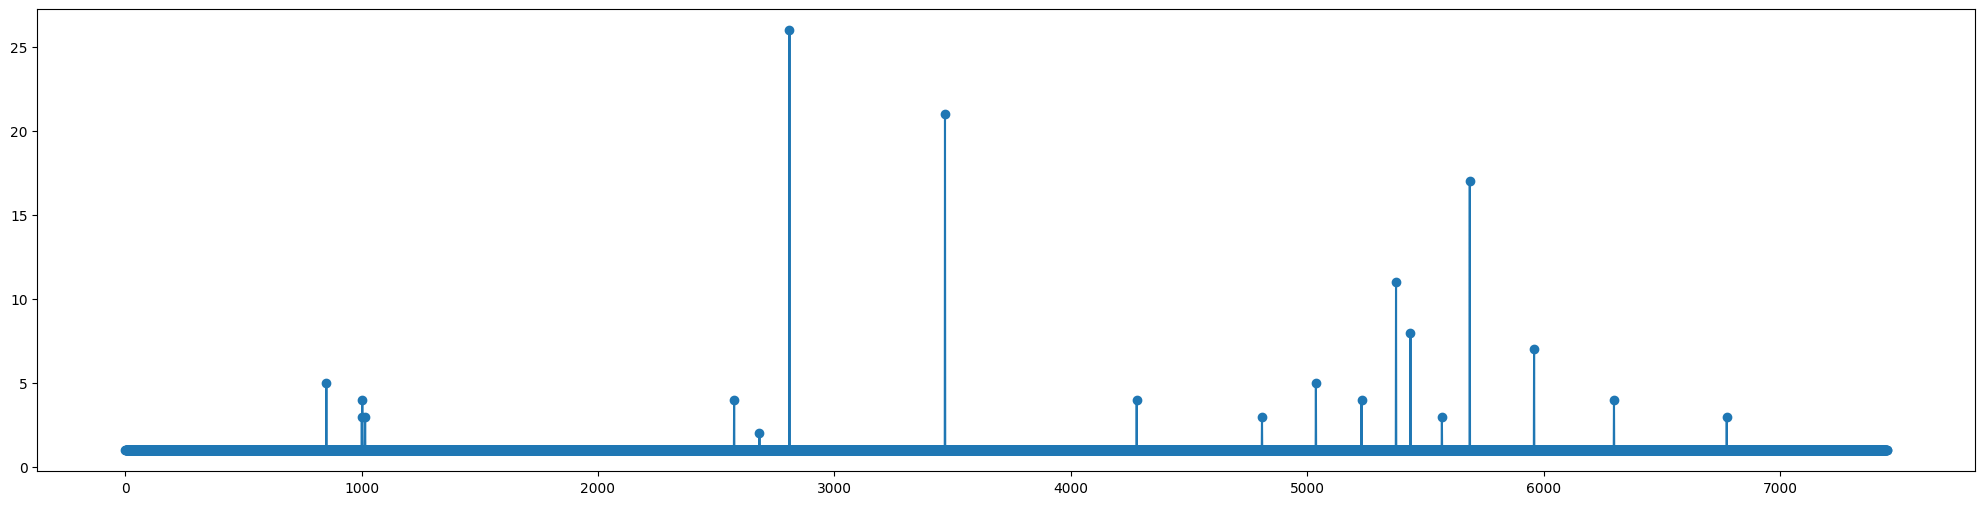

In [38]:
df_data_process(control_param_df_sheet)
